<a href="https://colab.research.google.com/github/nirvanK11/CartPole/blob/main/CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2

In [ ]:
!pip install gym

In [ ]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam
ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 4)                 0         
                                                                 
 dense_30 (Dense)            (None, 16)                80        
                                                                 
 dense_31 (Dense)            (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   14/10000: episode: 1, duration: 4.732s, episode steps:  14, steps per second:   3, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.357 [0.000, 1.000],  loss: 0.808252, mae: 0.787118, mean_q: -0.092862, mean_eps: 0.998920


/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   31/10000: episode: 2, duration: 0.340s, episode steps:  17, steps per second:  50, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.647 [0.000, 1.000],  loss: 0.690002, mae: 0.687842, mean_q: -0.009027, mean_eps: 0.998020
   51/10000: episode: 3, duration: 0.467s, episode steps:  20, steps per second:  43, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.600 [0.000, 1.000],  loss: 0.518049, mae: 0.575695, mean_q: 0.135723, mean_eps: 0.996355
   65/10000: episode: 4, duration: 0.285s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 0.423167, mae: 0.558288, mean_q: 0.249271, mean_eps: 0.994825
   86/10000: episode: 5, duration: 0.538s, episode steps:  21, steps per second:  39, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.381 [0.000, 1.000],  loss: 0.397646, mae: 0.550654, mean_q: 0.275922, mean_eps: 

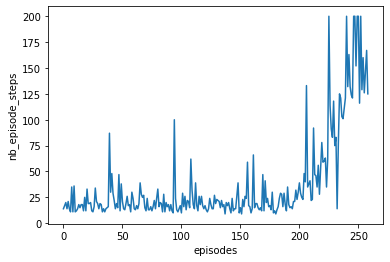

Testing for 20 episodes ...
Episode 1: reward: 149.000, steps: 149
Episode 2: reward: 173.000, steps: 173
Episode 3: reward: 135.000, steps: 135
Episode 4: reward: 129.000, steps: 129
Episode 5: reward: 137.000, steps: 137
Episode 6: reward: 173.000, steps: 173
Episode 7: reward: 143.000, steps: 143
Episode 8: reward: 147.000, steps: 147
Episode 9: reward: 137.000, steps: 137
Episode 10: reward: 121.000, steps: 121
Episode 11: reward: 125.000, steps: 125
Episode 12: reward: 161.000, steps: 161
Episode 13: reward: 161.000, steps: 161
Episode 14: reward: 131.000, steps: 131
Episode 15: reward: 166.000, steps: 166
Episode 16: reward: 142.000, steps: 142
Episode 17: reward: 185.000, steps: 185
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 190.000, steps: 190
Episode 20: reward: 143.000, steps: 143


In [ ]:
import rl
from rl.memory import SequentialMemory 
from rl.policy import EpsGreedyQPolicy
from rl.policy import LinearAnnealedPolicy
from rl.agents.dqn import DQNAgent      # import the DQN agent

memory = SequentialMemory(limit=500000, window_length=1)

policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=10000)
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))

model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-3, 
               policy=policy) 

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)